# Online class consequence ‍survey 


## Research Questions
- 1) Is there any effect of online education on students'productivity?
- 2) How is the level of readiness of students in terms of access to technology to participate in online classes?
- 3) is online mode of teaching more effective than offline teaching?

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl
import seaborn as sns
%matplotlib inline
import re
from scipy.stats import norm
pd.set_option("display.max_rows", None, "display.max_columns", None,'display.max_colwidth', -1)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('E:/Desktop/edu-metarial/Msc_eco_class meterial/Online class consequence ‍survey.csv')

In [3]:
df.drop(['Timestamp', 'Username'], axis =1, inplace = True)

In [4]:
df.head(3)

,Name / नाम,Age / उम्र,Gender / लिंग,Employment status / रोजगार की स्थिति,State / राज्य,District / जिला,Area / क्षेत्र,Number of members who are doing online classes in the family / परिवार में ऑनलाइन कक्षाएं कर रहे सदस्यों की संख्या,The number of earning members in the family. / परिवार में कमाई करने वाले सदस्यों की संख्या।,"What was the amount of loan or borrowed for education from others (like relatives, banks, friends etc.) during Lockdown ? / लॉकडाउन के दौरान शिक्षा के लिए दूसरों से (जैसे रिश्तेदार, बैंक, मित्र आदि) ऋण या उधार की राशि क्या थी ?",The number of children in Govt. school in class 1st to 10th. / पहली से दसवीं कक्षा में सरकारी स्कूल में बच्चों की संख्या।,The number of children in Govt. school/college in class 11th and 12th. / सरकारी स्कूल/कॉलेज में 11वीं और 12वीं कक्षा में बच्चों की संख्या।,The number of children in Govt. college in graduation and above. सरकारी कॉलेज में ग्रेजुएशन और उससे ऊपर के बच्चों की संख्या।,Has govt. school / college taken online classes during COVID19? / क्या सरकारी स्कूल/कॉलेज COVID19 के दौरान ऑनलाइन कक्षाएं ली हैं?,Number of Children dropped govt. school/college during the pandemic. / महामारी के दौरान सरकारी स्कूल/कॉलेज छोड़े गए बच्चों की संख्या ।,The number of children newly enrolled in govt. school/college during the pandemic. / महामारी के दौरान सरकारी स्कूल/कॉलेज में नए नामांकित बच्चों की संख्या ।,The number of children in a private school in class 1st to 10th. / पहली से दसवीं कक्षा में निजी स्कूल में बच्चों की संख्या।,The number of children in a private school in class 11th and 12th. / निजी स्कूल में कक्षा 11वीं और 12वीं में बच्चों की संख्या।,The number of children in a private college in graduation and above. / ग्रेजुएशन और उससे ऊपर के निजी कॉलेज में बच्चों की संख्या।,Has private school/college taken online classes during COVID19? / क्या निजी स्कूल/कॉलेज ने COVID19 के दौरान ऑनलाइन कक्षाएं ली हैं?,Number of Children dropped from private school/college during pandemic. / महामारी के दौरान निजी स्कूल/कॉलेज से छोड़े गए बच्चों की संख्या ।,Number of children newly enrolled in a private school/college during the pandemic / महामारी के दौरान निजी स्कूल/कॉलेज में नए नामांकित बच्चों की संख्या,Which all basic necessities do you have for online classes? (you can select more than one option) / ऑनलाइन कक्षाओं के लिए आपके पास कौन सी सभी बुनियादी आवश्यकताएं हैं? (आप एक से अधिक विकल्प चुन सकते हैं),Have you ever participated in any type of e-learning before the pandemic? / क्या आपने कभी महामारी से पहले किसी भी प्रकार के ई-लर्निंग में भाग लिया है?,What are the advantages of e-learning? Pick all that you consider true / ई-लर्निंग के क्या फायदे हैं? उन सभी को चुनें जिन्हें आप सच मानते हैं,What are the disadvantages of e-learning? Pick all that you consider true? / ई-लर्निंग के क्या नुकसान हैं? वह सब चुनें जिसे आप सच मानते हैं?,Online mode is more preferable over the offline mode of classes. / ऑफलाइन मोड कक्षाओं के ऊपर ऑनलाइन मोड कक्षाएं अधिक बेहतर हैं।,What is your productivity level in online classes compare to offline classes? / ऑफ़लाइन कक्षाओं की तुलना में ऑनलाइन कक्षाओं में आपका उत्पादकता स्तर क्या है?,Rate how much did you enjoy e-learning classes during the pandemic? / महामारी के दौरान आपने ऑनलाइन कक्षाओं का कितना आनंद लिया?,Describe your activeness during e-learning / ई-लर्निंग के दौरान अपनी सक्रियता का वर्णन करें,Rate the effectiveness of offline learning in comparison to online in terms of increasing knowledge / ज्ञान बढ़ाने के मामले में ऑनलाइन की तुलना में ऑफलाइन सीखने की प्रभावशीलता दर,What challenges have you or your family experienced due to Covid-19? Pick all that you consider true. / कोविड-19 के कारण आपने या आपके परिवार को किन चुनौतियों का अनुभव हुआ है? उन सभी को चुनें जिन्हें आप सच मानते हैं।,Did your school or college provide any financial aid or help for e-learning during COVID? / क्या आपके स्कूल या कॉलेज ने COVID के दौरान ई-लर्निंग के लिए कोई वित्तीय सहायता या मदद प्रदान की?,Have you taken any aid or help for e-learning during COVID? / क्या आपने COVID के दौरान ई-लर्निंग के लिए कोई सहाय

## Renameing The columns' name

In [5]:
col = df.columns

In [6]:
for i in col :
    name = i.split(sep ='/')[0]
    df.rename(columns = {i : name},inplace=True)

In [7]:
for i in col :
    name = i.split(sep ='.')[0].strip()
    df.rename(columns = {i : name},inplace=True)

In [8]:
## Dropping some unnecessary 'name' columns

df.drop(['Name '], axis =1, inplace = True)

In [9]:
## know columns name
df.columns

Index(['Age ', 'Gender ', 'Employment status ', 'State ', 'District ', 'Area ',
       'Number of members who are doing online classes in the family ',
       'The number of earning members in the family. ',
       'What was the amount of loan or borrowed for education from others (like relatives, banks, friends etc.)  during Lockdown ? ',
       'The number of children in Govt. school in class 1st to 10th. ',
       'The number of children in Govt. school',
       'The number of children in Govt', 'Has govt. school ',
       'Number of  Children dropped govt. school',
       'The number of children newly enrolled in govt. school',
       'The number of children in a private school in class 1st to 10th. ',
       'The number of children in a private school in class 11th and 12th. ',
       'The number of children in a private college in graduation and above. ',
       'Has private school', 'Number of Children dropped from private school',
       'Number of children newly enrolled in a 

In [10]:
## creating two subgroups of columns for encoding the data 
## (only one answer possible)
columns1= ['Age ', 'Gender ', 'Employment status ', 'State ', 'District ', 'Area ',
       'Number of members who are doing online classes in the family ',
       'The number of earning members in the family. ',
       'What was the amount of loan or borrowed for education from others (like relatives, banks, friends etc.)  during Lockdown ? ',
       'The number of children in Govt. school in class 1st to 10th. ',
       'The number of children in Govt. school',
       'The number of children in Govt', 'Has govt. school ',
       'Number of  Children dropped govt. school',
       'The number of children newly enrolled in govt. school',
       'The number of children in a private school in class 1st to 10th. ',
       'The number of children in a private school in class 11th and 12th. ',
       'The number of children in a private college in graduation and above. ',
       'Has private school', 'Number of Children dropped from private school',
       'Number of children newly enrolled in a private school',
       'Have you ever participated in any type of e-learning before the pandemic? ',
       'Online mode is more preferable over the offline mode of classes. ',
       'What is your productivity level in online classes compare to offline classes? ',
       'Rate how much did you enjoy e-learning classes during the pandemic? ',
       'Describe your activeness during e-learning ',
       'Rate the effectiveness of offline learning in comparison to online in terms of increasing knowledge  ',
       'Did your school or college provide any financial aid or help for e-learning during COVID? ',
       'Online education is a viable alternative during the COVID-19 pandemic ']

## More than one answer possible
columns2 = ['What are the advantages of e-learning? Pick all that you consider true ',
       'What are the disadvantages of e-learning? Pick all that you consider true? ',
           'What challenges have you or your family experienced due to Covid-19? Pick all that you consider true. ',
           'Have you taken any aid or help for e-learning during COVID? ',
           'Which all basic necessities do you have for online classes? (you can select more than one option) ']

## creating coulmns for Dummy variable( One hot Encoding)
add_col = ['Adv_online_materials','Adv_Learning_on_own_pace','Adv_stay_at_home','Adv_teaching_interactive','Adv_record_meeting',
           
           'Dis_Technical_problems','Dis_Reduced_interaction_with_teacher','Dis_less_interactions_with_peer_and_friends',
          'Dis_Poor_learning_conditions_at_home','Dis_Lack_of_self_discipline','Dis_Social_isolation',
          'covid_Decrease-in_income','covid_Job_loss','covid_Not_able_to focus_on_study','covid_infected','covid_Much_focus_on_medical_emergencies',
          'Aid_fund_from_govt_or_NGO','Aid_fund_from other sources','Aid_Food_grain instead of mid-day meal','Aid_None',
           'Laptop_or_mobile','internet_connectivity','Electricity'
          ]


In [11]:
## create an empty Dataframe with same Dimension of original one
df1 = pd.DataFrame(index= range(0,len(df)),columns=df.columns)

In [12]:
## creating New Columns for Encoding the Multiple Select Questions data type 
df1[add_col] =np.nan

In [13]:
df1.head()

,Age,Gender,Employment status,State,District,Area,Number of members who are doing online classes in the family,The number of earning members in the family.,"What was the amount of loan or borrowed for education from others (like relatives, banks, friends etc.) during Lockdown ?",The number of children in Govt. school in class 1st to 10th.,The number of children in Govt. school,The number of children in Govt,Has govt. school,Number of Children dropped govt. school,The number of children newly enrolled in govt. school,The number of children in a private school in class 1st to 10th.,The number of children in a private school in class 11th and 12th.,The number of children in a private college in graduation and above.,Has private school,Number of Children dropped from private school,Number of children newly enrolled in a private school,Which all basic necessities do you have for online classes? (you can select more than one option),Have you ever participated in any type of e-learning before the pandemic?,What are the advantages of e-learning? Pick all that you consider true,What are the disadvantages of e-learning? Pick all that you consider true?,Online mode is more preferable over the offline mode of classes.,What is your productivity level in online classes compare to offline classes?,Rate how much did you enjoy e-learning classes during the pandemic?,Describe your activeness during e-learning,Rate the effectiveness of offline learning in comparison to online in terms of increasing knowledge,What challenges have you or your family experienced due to Covid-19? Pick all that you consider true.,Did your school or college provide any financial aid or help for e-learning during COVID?,Have you taken any aid or help for e-learning during COVID?,Online education is a viable alternative during the COVID-19 pandemic,Adv_online_materials,Adv_Learning_on_own_pace,Adv_stay_at_home,Adv_teaching_interactive,Adv_record_meeting,Dis_Technical_problems,Dis_Reduced_interaction_with_teacher,Dis_less_interactions_with_peer_and_friends,Dis_Poor_learning_conditions_at_home,Dis_Lack_of_self_discipline,Dis_Social_isolation,covid_Decrease-in_income,covid_Job_loss,covid_Not_able_to focus_on_study,covid_infected,covid_Much_focus_on_medical_emergencies,Aid_fund_from_govt_or_NGO,Aid_fund_from other sources,Aid_Food_grain instead of mid-day meal,Aid_None,Laptop_or_mobile,internet_connectivity,Electricity
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING 

### Removing unwaanted character from data 

In [14]:
for i in columns1 :
    if (df[i].dtype != 'int64') | (df[i].dtypes != 'float64') :
        for j in range(len(df)) :
            k = str(df.loc[j ,i]).split('/')[0]
            df1.loc[j , i] = k

In [15]:
df1.head()

,Age,Gender,Employment status,State,District,Area,Number of members who are doing online classes in the family,The number of earning members in the family.,"What was the amount of loan or borrowed for education from others (like relatives, banks, friends etc.) during Lockdown ?",The number of children in Govt. school in class 1st to 10th.,The number of children in Govt. school,The number of children in Govt,Has govt. school,Number of Children dropped govt. school,The number of children newly enrolled in govt. school,The number of children in a private school in class 1st to 10th.,The number of children in a private school in class 11th and 12th.,The number of children in a private college in graduation and above.,Has private school,Number of Children dropped from private school,Number of children newly enrolled in a private school,Which all basic necessities do you have for online classes? (you can select more than one option),Have you ever participated in any type of e-learning before the pandemic?,What are the advantages of e-learning? Pick all that you consider true,What are the disadvantages of e-learning? Pick all that you consider true?,Online mode is more preferable over the offline mode of classes.,What is your productivity level in online classes compare to offline classes?,Rate how much did you enjoy e-learning classes during the pandemic?,Describe your activeness during e-learning,Rate the effectiveness of offline learning in comparison to online in terms of increasing knowledge,What challenges have you or your family experienced due to Covid-19? Pick all that you consider true.,Did your school or college provide any financial aid or help for e-learning during COVID?,Have you taken any aid or help for e-learning during COVID?,Online education is a viable alternative during the COVID-19 pandemic,Adv_online_materials,Adv_Learning_on_own_pace,Adv_stay_at_home,Adv_teaching_interactive,Adv_record_meeting,Dis_Technical_problems,Dis_Reduced_interaction_with_teacher,Dis_less_interactions_with_peer_and_friends,Dis_Poor_learning_conditions_at_home,Dis_Lack_of_self_discipline,Dis_Social_isolation,covid_Decrease-in_income,covid_Job_loss,covid_Not_able_to focus_on_study,covid_infected,covid_Much_focus_on_medical_emergencies,Aid_fund_from_govt_or_NGO,Aid_fund_from other sources,Aid_Food_grain instead of mid-day meal,Aid_None,Laptop_or_mobile,internet_connectivity,Electricity
0,24,Male,nan,Bihar,Patna,Urban,3,1,₹10000-20000,None,None,3 or more,No,None,None,None,None,None,Yes,None,None,NaN,Yes,NaN,NaN,Strongly disagree,2,1,2,3,NaN,No,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,Male,nan,Bihar,PATNA,Rural,2,1,not applicable,None,None,None,Yes,None,None,None,None,None,Yes,None,None,NaN,Yes,NaN,NaN,Strongly disagree,1,1,2,5,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,Male,nan,Bihar,Patna,Rural,more than 3,1,₹5000-10000,None,None,2,Yes,1,None,None,None,2,Yes,None,None,NaN,Yes,NaN,NaN,Disagree,4,3,3,3,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,Male,Student,Bihar,Patna,Urban,3,1,₹10000-20000,None,None,3 or more,No,None,None,None,None,None,not applicable,None,None,NaN,No,NaN,NaN,Strongly disagree,3,2,2,2,NaN,No,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Male,Student,Bihar,West Champaran (Bettiah),Rural,2,1,above ₹30000,None,1,2,Yes,None,None,None,None,None,No,None,None,NaN,Yes,NaN,NaN,Agree,4,5,4,4,NaN,No,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
## Encoding the column :  'What are the advantages of e-learning? Pick all that you consider true '
j = 0
for i in df['What are the advantages of e-learning? Pick all that you consider true '] :
        x = re.findall("Access to online materials |Learning on your own pace |Ability to stay at home |Mode of teaching is more interactive |Ability to record a meeting |Comfortable surrounding ", i)
        if 'Access to online materials ' in x :
            df1.loc[j,'Adv_online_materials'] = 1
        else :
            df1.loc[j,'Adv_online_materials'] = 0
        if 'Learning on your own pace ' in x :
            df1.loc[j,'Adv_Learning_on_own_pace'] = 1
        else :
            df1.loc[j,'Adv_Learning_on_own_pace'] = 0

        if 'Ability to stay at home ' in x :
            df1.loc[j,'Adv_stay_at_home'] =1
        else :
            df1.loc[j,'Adv_stay_at_home'] = 0
        if 'Mode of teaching is more interactive ' in x :
            df1.loc[j,'Adv_teaching_interactive'] =1
        else :
             df1.loc[j,'Adv_teaching_interactive'] = 0 
                
        if 'Ability to record a meeting ' in x :
            df1.loc[j,'Adv_record_meeting'] =1
        else : 
             df1.loc[j,'Adv_record_meeting'] = 0
        if 'Comfortable surrounding ' in x :
            df1.loc[j,'Adv_record_meeting'] =1
        else : 
            df1.loc[j,'Adv_record_meeting'] = 0
            
        j = j+1

In [17]:
## Encoding the column : 'What are the disadvantages of e-learning? Pick all that you consider true? ',
          
j =0
for i in df['What are the disadvantages of e-learning? Pick all that you consider true? '] :
        x = re.findall("Reduced interaction with the teacher|Technical problems|Lack of interactions with peer groups and friends|Poor learning conditions at home|Lack of self-discipline|Social isolation", i)
        if 'Reduced interaction with the teacher' in x :
            df1.loc[j,'Dis_Reduced_interaction_with_teacher'] = 1
        else :
            df1.loc[j,'Dis_Reduced_interaction_with_teacher'] = 0
        if 'Technical problems' in x :
            df1.loc[j,'Dis_Technical_problems'] = 1
        else :
            df1.loc[j,'Dis_Technical_problems'] = 0

        if 'Lack of interactions with peer groups and friends' in x :
            df1.loc[j,'Dis_less_interactions_with_peer_and_friends'] =1
        else :
            df1.loc[j,'Dis_less_interactions_with_peer_and_friends'] = 0
        if 'Poor learning conditions at home' in x :
            df1.loc[j,'Dis_Poor_learning_conditions_at_home'] =1
        else :
             df1.loc[j,'Dis_Poor_learning_conditions_at_home'] = 0 
                
        if 'Lack of self-discipline' in x :
            df1.loc[j,'Dis_Lack_of_self_discipline'] =1
        else : 
             df1.loc[j,'Dis_Lack_of_self_discipline'] = 0
                
        if 'Social isolation' in x :
            df1.loc[j, 'Dis_Social_isolation'] =1
        else : 
            df1.loc[j,'Dis_Social_isolation'] = 0
            
        j = j+1

In [18]:
##  Encoding columns :  'What challenges have you or your family experienced due to Covid-19? Pick all that you consider true. ',
j = 0
for i in df['What challenges have you or your family experienced due to Covid-19? Pick all that you consider true. '] :
        x = re.findall("Decrease in income|Not able to focus on study|COVID infected|Not able to focus on study|COVID infected|Much focus on medical emergencies", i)
        if 'Decrease in income' in x :
            df1.loc[j,'covid_Decrease-in_income'] = 1
        else :
            df1.loc[j,'covid_Decrease-in_income'] = 0
        if 'Not able to focus on study' in x :
            df1.loc[j,'covid_Not_able_to focus_on_study'] = 1
        else :
            df1.loc[j,'covid_Not_able_to focus_on_study'] = 0

        if 'COVID infected ' in x :
            df1.loc[j,'covid_infected'] =1
        else :
            df1.loc[j,'covid_infected'] = 0
        if  'Job loss' in x :
            df1.loc[j,'covid_Job_loss'] =1
        else :
             df1.loc[j,'covid_Job_loss'] = 0 
                
        if 'Much focus on medical emergencies' in x :
            df1.loc[j,'covid_Much_focus_on_medical_emergencies'] =1
        else : 
             df1.loc[j,'covid_Much_focus_on_medical_emergencies'] = 0
            
        j = j+1

In [19]:
## Encoding the column : 'Have you taken any aid or help for e-learning during COVID? ',
           
j = 0
for i in df['Have you taken any aid or help for e-learning during COVID? '] :
        x = re.findall("Fund transfer from govt. or NGO|Fund transfer from other sources|Food grain instead of mid-day meal|None", i)
        if 'Fund transfer from govt. or NGO' in x :
            df1.loc[j,'Aid_fund_from_govt_or_NGO'] = 1
        else :
            df1.loc[j,'Aid_fund_from_govt_or_NGO'] = 0
            
        if 'Fund transfer from other sources' in x :
            df1.loc[j,'Aid_fund_from other sources'] = 1
        else :
            df1.loc[j,'Aid_fund_from other sources'] = 0

        if 'Food grain instead of mid-day meal' in x :
            df1.loc[j,'Aid_Food_grain instead of mid-day meal'] =1
        else :
            df1.loc[j,'Aid_Food_grain instead of mid-day meal'] = 0
        if  'None' in x :
            df1.loc[j,'Aid_None'] =1
        else :
             df1.loc[j,'Aid_None'] = 0 
            
        j = j+1

In [20]:
## Encoding the column : 'Which all basic necessities do you have for online classes? (you can select more than one option) '

j = 0
for i in df['Which all basic necessities do you have for online classes? (you can select more than one option) '] :
        x = re.findall("Laptop or mobile|Good internet connectivity|Electricity", i)
        if 'Laptop or mobile' in x :
            df1.loc[j,'Laptop_or_mobile'] = 1
        else :
            df1.loc[j,'Laptop_or_mobile'] = 0
            
        if 'Good internet connectivity' in x :
            df1.loc[j,'internet_connectivity'] = 1
        else :
            df1.loc[j,'internet_connectivity'] = 0

        if 'Electricity' in x :
            df1.loc[j,'Electricity'] =1
        else :
            df1.loc[j,'Electricity'] = 0
            
        j = j+1

In [21]:
## Drop some coulmns which are encoded already into other columns

df1.drop(['Which all basic necessities do you have for online classes? (you can select more than one option) ',
          'What are the advantages of e-learning? Pick all that you consider true ',
       'What are the disadvantages of e-learning? Pick all that you consider true? ',
         'What challenges have you or your family experienced due to Covid-19? Pick all that you consider true. ',
          'Have you taken any aid or help for e-learning during COVID? '],axis =1,inplace = True)

In [22]:
df1.columns

Index(['Age ', 'Gender ', 'Employment status ', 'State ', 'District ', 'Area ',
       'Number of members who are doing online classes in the family ',
       'The number of earning members in the family. ',
       'What was the amount of loan or borrowed for education from others (like relatives, banks, friends etc.)  during Lockdown ? ',
       'The number of children in Govt. school in class 1st to 10th. ',
       'The number of children in Govt. school',
       'The number of children in Govt', 'Has govt. school ',
       'Number of  Children dropped govt. school',
       'The number of children newly enrolled in govt. school',
       'The number of children in a private school in class 1st to 10th. ',
       'The number of children in a private school in class 11th and 12th. ',
       'The number of children in a private college in graduation and above. ',
       'Has private school', 'Number of Children dropped from private school',
       'Number of children newly enrolled in a 

In [23]:
df1.rename(columns={'Number of members who are doing online classes in the family ':'No_online_cls',
                   'The number of earning members in the family. ':'earning_members',
                   'What was the amount of loan or borrowed for education from others (like relatives, banks, friends etc.)  during Lockdown ? ' :'loan_amt',
                   'The number of children in Govt. school in class 1st to 10th. ' : 'no_childern_govt_primy',
                    'Have you ever participated in any type of e-learning before the pandemic? ' : 'online_cls_participated_before' ,
                    'What is your productivity level in online classes compare to offline classes? ' : 'productivity_level online_cls',
                    'Rate how much did you enjoy e-learning classes during the pandemic? ' : 'enjoy e-learning',
                    'Rate the effectiveness of offline learning in comparison to online in terms of increasing knowledge  ' : 'effectiveness_of_offline_learning',
                    'Did your school or college provide any financial aid or help for e-learning during COVID? ' : 'finacial_aid_school_or_college'
                    
            },inplace = True)

In [24]:
df1.head()

,Age,Gender,Employment status,State,District,Area,No_online_cls,earning_members,loan_amt,no_childern_govt_primy,The number of children in Govt. school,The number of children in Govt,Has govt. school,Number of Children dropped govt. school,The number of children newly enrolled in govt. school,The number of children in a private school in class 1st to 10th.,The number of children in a private school in class 11th and 12th.,The number of children in a private college in graduation and above.,Has private school,Number of Children dropped from private school,Number of children newly enrolled in a private school,online_cls_participated_before,Online mode is more preferable over the offline mode of classes.,productivity_level online_cls,enjoy e-learning,Describe your activeness during e-learning,effectiveness_of_offline_learning,finacial_aid_school_or_college,Online education is a viable alternative during the COVID-19 pandemic,Adv_online_materials,Adv_Learning_on_own_pace,Adv_stay_at_home,Adv_teaching_interactive,Adv_record_meeting,Dis_Technical_problems,Dis_Reduced_interaction_with_teacher,Dis_less_interactions_with_peer_and_friends,Dis_Poor_learning_conditions_at_home,Dis_Lack_of_self_discipline,Dis_Social_isolation,covid_Decrease-in_income,covid_Job_loss,covid_Not_able_to focus_on_study,covid_infected,covid_Much_focus_on_medical_emergencies,Aid_fund_from_govt_or_NGO,Aid_fund_from other sources,Aid_Food_grain instead of mid-day meal,Aid_None,Laptop_or_mobile,internet_connectivity,Electricity
0,24,Male,nan,Bihar,Patna,Urban,3,1,₹10000-20000,None,None,3 or more,No,None,None,None,None,None,Yes,None,None,Yes,Strongly disagree,2,1,2,3,No,No,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,19,Male,nan,Bihar,PATNA,Rural,2,1,not applicable,None,None,None,Yes,None,None,None,None,None,Yes,None,None,Yes,Strongly disagree,1,1,2,5,Yes,Yes,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,19,Male,nan,Bihar,Patna,Rural,more than 3,1,₹5000-10000,None,None,2,Yes,1,None,None,None,2,Yes,None,None,Yes,Disagree,4,3,3,3,Yes,Yes,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,24,Male,Student,Bihar,Patna,Urban,3,1,₹10000-20000,None,None,3 or more,No,None,None,None,None,None,not applicable,None,None,No,Strongly disagree,3,2,2,2,No,No,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,24,Male,Student,Bihar,West Champaran (Bettiah),Rural,2,1,above ₹30000,None,1,2,Yes,None,None,None,None,None,No,None,None,Yes,Agree,4,5,4,4,No,Yes,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [25]:
## Selecting the sample from Bihar State

df1 = df1[df1['State ']=='Bihar'] 
saple_size  = len(df1)

In [26]:
df1.head()

,Age,Gender,Employment status,State,District,Area,No_online_cls,earning_members,loan_amt,no_childern_govt_primy,The number of children in Govt. school,The number of children in Govt,Has govt. school,Number of Children dropped govt. school,The number of children newly enrolled in govt. school,The number of children in a private school in class 1st to 10th.,The number of children in a private school in class 11th and 12th.,The number of children in a private college in graduation and above.,Has private school,Number of Children dropped from private school,Number of children newly enrolled in a private school,online_cls_participated_before,Online mode is more preferable over the offline mode of classes.,productivity_level online_cls,enjoy e-learning,Describe your activeness during e-learning,effectiveness_of_offline_learning,finacial_aid_school_or_college,Online education is a viable alternative during the COVID-19 pandemic,Adv_online_materials,Adv_Learning_on_own_pace,Adv_stay_at_home,Adv_teaching_interactive,Adv_record_meeting,Dis_Technical_problems,Dis_Reduced_interaction_with_teacher,Dis_less_interactions_with_peer_and_friends,Dis_Poor_learning_conditions_at_home,Dis_Lack_of_self_discipline,Dis_Social_isolation,covid_Decrease-in_income,covid_Job_loss,covid_Not_able_to focus_on_study,covid_infected,covid_Much_focus_on_medical_emergencies,Aid_fund_from_govt_or_NGO,Aid_fund_from other sources,Aid_Food_grain instead of mid-day meal,Aid_None,Laptop_or_mobile,internet_connectivity,Electricity
0,24,Male,nan,Bihar,Patna,Urban,3,1,₹10000-20000,None,None,3 or more,No,None,None,None,None,None,Yes,None,None,Yes,Strongly disagree,2,1,2,3,No,No,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,19,Male,nan,Bihar,PATNA,Rural,2,1,not applicable,None,None,None,Yes,None,None,None,None,None,Yes,None,None,Yes,Strongly disagree,1,1,2,5,Yes,Yes,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,19,Male,nan,Bihar,Patna,Rural,more than 3,1,₹5000-10000,None,None,2,Yes,1,None,None,None,2,Yes,None,None,Yes,Disagree,4,3,3,3,Yes,Yes,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,24,Male,Student,Bihar,Patna,Urban,3,1,₹10000-20000,None,None,3 or more,No,None,None,None,None,None,not applicable,None,None,No,Strongly disagree,3,2,2,2,No,No,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,24,Male,Student,Bihar,West Champaran (Bettiah),Rural,2,1,above ₹30000,None,1,2,Yes,None,None,None,None,None,No,None,None,Yes,Agree,4,5,4,4,No,Yes,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [27]:
## Replacing 'nan' with 'Student' in 'Employment status ' Status columns

df1['Employment status '].replace('nan','Student ',inplace= True)

In [28]:
df1.head()

,Age,Gender,Employment status,State,District,Area,No_online_cls,earning_members,loan_amt,no_childern_govt_primy,The number of children in Govt. school,The number of children in Govt,Has govt. school,Number of Children dropped govt. school,The number of children newly enrolled in govt. school,The number of children in a private school in class 1st to 10th.,The number of children in a private school in class 11th and 12th.,The number of children in a private college in graduation and above.,Has private school,Number of Children dropped from private school,Number of children newly enrolled in a private school,online_cls_participated_before,Online mode is more preferable over the offline mode of classes.,productivity_level online_cls,enjoy e-learning,Describe your activeness during e-learning,effectiveness_of_offline_learning,finacial_aid_school_or_college,Online education is a viable alternative during the COVID-19 pandemic,Adv_online_materials,Adv_Learning_on_own_pace,Adv_stay_at_home,Adv_teaching_interactive,Adv_record_meeting,Dis_Technical_problems,Dis_Reduced_interaction_with_teacher,Dis_less_interactions_with_peer_and_friends,Dis_Poor_learning_conditions_at_home,Dis_Lack_of_self_discipline,Dis_Social_isolation,covid_Decrease-in_income,covid_Job_loss,covid_Not_able_to focus_on_study,covid_infected,covid_Much_focus_on_medical_emergencies,Aid_fund_from_govt_or_NGO,Aid_fund_from other sources,Aid_Food_grain instead of mid-day meal,Aid_None,Laptop_or_mobile,internet_connectivity,Electricity
0,24,Male,Student,Bihar,Patna,Urban,3,1,₹10000-20000,None,None,3 or more,No,None,None,None,None,None,Yes,None,None,Yes,Strongly disagree,2,1,2,3,No,No,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,19,Male,Student,Bihar,PATNA,Rural,2,1,not applicable,None,None,None,Yes,None,None,None,None,None,Yes,None,None,Yes,Strongly disagree,1,1,2,5,Yes,Yes,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,19,Male,Student,Bihar,Patna,Rural,more than 3,1,₹5000-10000,None,None,2,Yes,1,None,None,None,2,Yes,None,None,Yes,Disagree,4,3,3,3,Yes,Yes,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,24,Male,Student,Bihar,Patna,Urban,3,1,₹10000-20000,None,None,3 or more,No,None,None,None,None,None,not applicable,None,None,No,Strongly disagree,3,2,2,2,No,No,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,24,Male,Student,Bihar,West Champaran (Bettiah),Rural,2,1,above ₹30000,None,1,2,Yes,None,None,None,None,None,No,None,None,Yes,Agree,4,5,4,4,No,Yes,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


### Q1 Is there any effect of online education on students' productivity?

In [29]:
### Mode of the column : Rate the effectiveness of offline learning in comparison to online in terms of increasing knowledge.

df1['productivity_level online_cls'] = df1['productivity_level online_cls'].astype(int)

In [30]:
## 
x = dict(df1['productivity_level online_cls'].value_counts(normalize = True))

for i, j in zip(x.keys(), x.values()) :
    print(round(j*100,2), "% people chose prodicitivity level in online class compare to offline class mode is (in 1 to 5 level)", i)

29.79 % people chose prodicitivity level in online class compare to offline class mode is (in 1 to 5 level) 2
26.6 % people chose prodicitivity level in online class compare to offline class mode is (in 1 to 5 level) 3
15.96 % people chose prodicitivity level in online class compare to offline class mode is (in 1 to 5 level) 4
14.89 % people chose prodicitivity level in online class compare to offline class mode is (in 1 to 5 level) 1
12.77 % people chose prodicitivity level in online class compare to offline class mode is (in 1 to 5 level) 5


In [31]:
mode_prdty_level = df1['productivity_level online_cls'].mode()
mean_prdty_level = df1['productivity_level online_cls'].mean()
std_prdty_level = df1['productivity_level online_cls'].std()

Text(0.5, 1.0, 'frequency distibution of  productivity level in online classes compare to offline classes ')

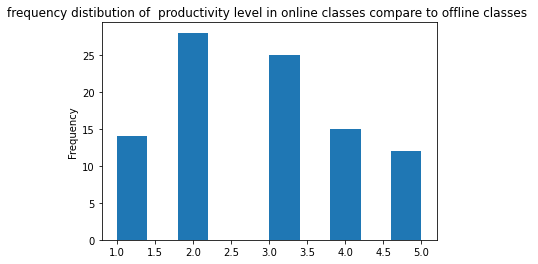

In [32]:
df1['productivity_level online_cls'].plot.hist()
ptl.title('frequency distibution of  productivity level in online classes compare to offline classes ')

In [33]:
saple_size , mean_prdty_level 

(94, 2.8191489361702127)

## Q1 Is there any effect of online education on students'productivity?
- Apply the t-test to cheak is there any significant change in student productivity level in online class compare to offline class

-  Null Hypothesis : there is no difference between student productivity level in offline and online mode of teaching
                   productivity level = 3
- Alternative Hypothesis  there is significance difference between student productivity level in offline and online mode of    teaching                 
- at  level of Significance = 0.05
- t statics = (actual value - expected value)/( standard error)

In [34]:
t_stats = (mean_prdty_level - 3)/(std_prdty_level /np.sqrt(saple_size))
t_stats

-1.4094755520950277

### P-Value is The p-value is .16217  > 0.05

- Don't reject the Ho , there is no significant evidence to reject Null Hypothesis.
- Hance  there is no difference between student productivity level in offline and online mode of teaching

In [35]:
df1.columns

Index(['Age ', 'Gender ', 'Employment status ', 'State ', 'District ', 'Area ',
       'No_online_cls', 'earning_members', 'loan_amt',
       'no_childern_govt_primy', 'The number of children in Govt. school',
       'The number of children in Govt', 'Has govt. school ',
       'Number of  Children dropped govt. school',
       'The number of children newly enrolled in govt. school',
       'The number of children in a private school in class 1st to 10th. ',
       'The number of children in a private school in class 11th and 12th. ',
       'The number of children in a private college in graduation and above. ',
       'Has private school', 'Number of Children dropped from private school',
       'Number of children newly enrolled in a private school',
       'online_cls_participated_before',
       'Online mode is more preferable over the offline mode of classes. ',
       'productivity_level online_cls', 'enjoy e-learning',
       'Describe your activeness during e-learning ',
     

### is there any association between effectiveness of offline mode of education and productivity level in online class

Text(0.5, 1.0, 'scater plot between effectiveness_of_offline_learning and productivity_level online_cls ')

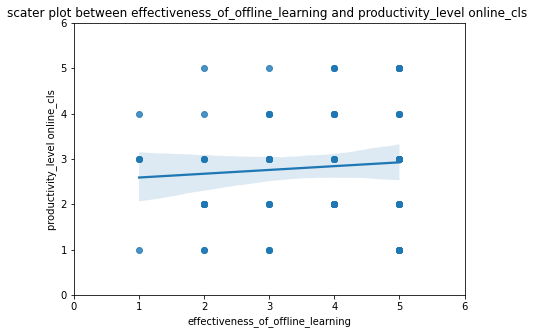

In [39]:
df1['effectiveness_of_offline_learning'] = df1['effectiveness_of_offline_learning'].astype('int')
df1['productivity_level online_cls'] = df1['productivity_level online_cls'].astype('int')
ptl.figure(figsize=(7,5))
ptl.xlim(0,6)
ptl.ylim(0,6)
sns.regplot(x = 'effectiveness_of_offline_learning',y = 'productivity_level online_cls',x_ci =  "sd",data = df1)
ptl.title('scater plot between effectiveness_of_offline_learning and productivity_level online_cls ')

- the regression line is almost flat , which implies productivity level is independent from the attribute "effectivness of offline learning". there is no such relation between these two variables , hence if someone believe  offline mode of education is more effective it doesn't imply that they will be less productive in e-learning and vice-versa.
- In short, wethere a student is a good in offline mode of eduction or not , on avarege at all scale, student beleive they are less productive than offline mode.

### is there any association between activeness of student  and productivity level during e-learning lectures

Text(0.5, 1.0, 'Scatter plot between Productivity level in e-learning Vs activeness during e-learning')

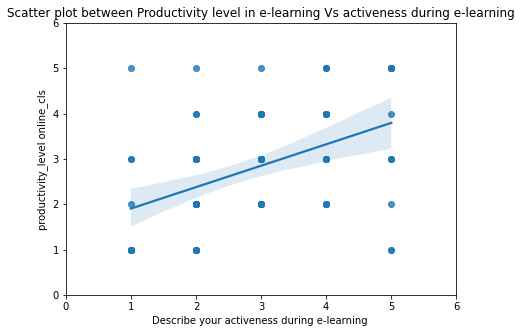

In [40]:
df1['Describe your activeness during e-learning '] = df1['Describe your activeness during e-learning '].astype(int)
ptl.figure(figsize=(7,5))
ptl.xlim(0,6)
ptl.ylim(0,6)
sns.regplot(x = 'Describe your activeness during e-learning ',
            y = 'productivity_level online_cls', 
            x_ci =  "sd", 
            data = df1)

ptl.title('Scatter plot between Productivity level in e-learning Vs activeness during e-learning')


- there is a positive relationship between students's productivity level and activness of a studentds in e-learning.Hance if a student is more active than other student, it may implies that student is more productive than offline education mode and they are using time wisely.


### is there any association between student's enjoyment level during  e-learning and productivity level in online class

Text(0.5, 1.0, "Scatter plot between Productivity level in e-learning Vs student's enjoyment level of e-learning class")

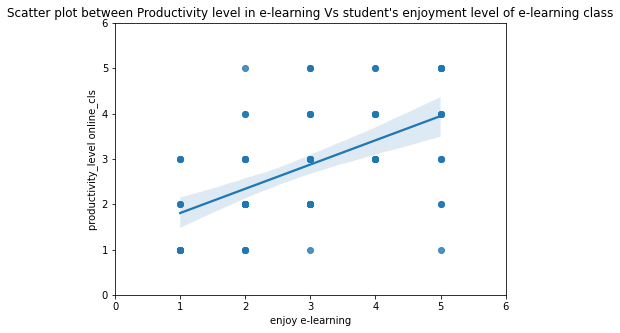

In [41]:
df1['enjoy e-learning'] = df1['enjoy e-learning'].astype(int)
ptl.figure(figsize=(7,5))
ptl.xlim(0,6)
ptl.ylim(0,6)
sns.regplot(x = 'enjoy e-learning', y = 'productivity_level online_cls',  x_ci =  "sd", data = df1)
ptl.title("Scatter plot between Productivity level in e-learning Vs student's enjoyment level of e-learning class")


## Q2 How is the level of readiness of students in terms of access to technology to participate in online classes?

In [42]:
df2 = df1[['Laptop_or_mobile','internet_connectivity','Electricity']]

In [43]:
for i in df2.columns :
    prop = round(df2[i].sum()/len(df2),2)
    print(prop*100 ,"% student have "+ i + " access")

88.0 % student have Laptop_or_mobile access
45.0 % student have internet_connectivity access
54.0 % student have Electricity access


- these result show , a chellenging problem to make e-learning feasibile at pan level, since only 45% student have access of good internet and 54% student have enough electricity to support their e-learning. these two factors are more and less not controlable by household/student,wheares having access of laptop or Mobile is controlable factor which can be access by a student.

- Hance, at currnet situation and data say , e-learning is not a feasible solution for all students

In [44]:
len(df1[df1['Area '] !='Urban ']), len(df1[df1['Area '] =='Urban '])

(37, 57)

In [45]:
df2_urban = df1[df1['Area '] =='Urban '][['Laptop_or_mobile','internet_connectivity','Electricity']]
df2_rural = df1[df1['Area '] !='Urban '][['Laptop_or_mobile','internet_connectivity','Electricity']]
len_df2_rural = len(df1[df1['Area '] !='Urban '])
len_df2_urban = len(df1[df1['Area '] =='Urban '])

In [47]:
for i in df2_urban.columns:
    prop_urban = round(df2_urban[i].sum()/len_df2_urban,2 )
    prop_rural = round(df2_rural[i].sum()/len_df2_rural,2)
    print(prop_urban*100 ,"% student have "+ i + " access in Urban whereas",prop_rural*100,"% student in Rural")

91.0 % student have Laptop_or_mobile access in Urban whereas 84.0 % student in Rural
39.0 % student have internet_connectivity access in Urban whereas 54.0 % student in Rural
49.0 % student have Electricity access in Urban whereas 62.0 % student in Rural


## Q3  is online mode of teaching more effective than offline teaching?

### Apply t-test :
    Null Hypothesis :Both Online and offline mode of teaching have same effectiveness level in term of increasing knowledge
    Alernative Hypothesis : there is a significant difference
    level of significant : 5% or 0.05

In [90]:
df1['effectiveness_of_offline_learning'].describe()

count    94.000000
mean     3.723404 
std      1.256418 
min      1.000000 
25%      3.000000 
50%      4.000000 
75%      5.000000 
max      5.000000 
Name: effectiveness_of_offline_learning, dtype: float64

Text(0, 0.5, 'frequency')

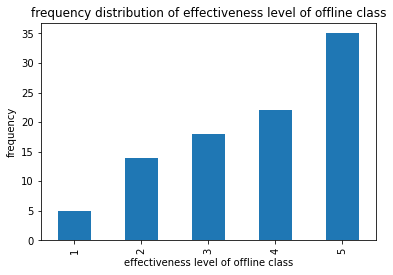

In [91]:
## Frequencyy distribution of effectiveness level of offline class
df1['effectiveness_of_offline_learning'].value_counts().sort_values().plot(kind = 'bar')
ptl.title('frequency distribution of effectiveness level of offline class')
ptl.xlabel('effectiveness level of offline class')
ptl.ylabel('frequency')

In [114]:
mode  = df1['effectiveness_of_offline_learning'].mode()
mean =  df1['effectiveness_of_offline_learning'].mean()
std =  df1['effectiveness_of_offline_learning'].std()
sample_size = len(df1['effectiveness_of_offline_learning'])
df = sample_size-1
pop_mean= 3
t_statis = (mean - pop_mean)/(std/np.sqrt(sample_size))
p_value = norm.cdf(-1*t_statis, df)
print('t-test statics is : ',t_statis, 'with p-value: ',p_value)

t-test statics is :  5.582270069643243 with p-value:  0.0


- Since p- value is lesser than level of significant(0.05) , hance we reject the Null Hypothesis. 
- Hance, students prefer the offline mode of teaching over the online mode of teaching in term knowledge gain, which  imply student understand more in offline class than online class mode.

## Conclusion :
#### student accept, they are less productive in e-learning , it may be beacuse of being online they might face many notification or scoial media use during class or engage in less productive work on internet(like online gaming, get engage in social media trends etc.).  other finding is only 88.0 % student have Laptop or mobile access , 45.0 % have  good internet connectivity access and 54.0 %    have enough Electricity access, which implly we are in a situation to make e-learning feasible to all students , we need to provide them basic necessity to start e-learning. where as we got offline mode of teaching is more effective than online class. student understand better in offline class than online class mode, it may me because of less interective between teacher and students or some techincal issue arise during lecture.